In [306]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
import pandas as pd
import numpy as np

df = pd.read_csv('Wholesale customers data.csv')

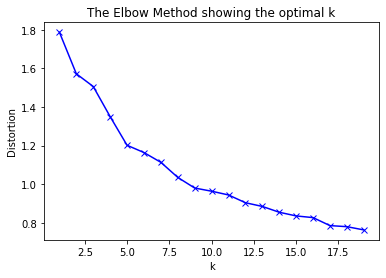

In [307]:
channel = df.Channel
#drop
df = df.drop(['Channel', 'Region'], axis=1)
#scale
pre_process = preprocessing.StandardScaler()
scaled = pre_process.fit_transform(df)

#find optimal k using elbow method
distortions = []
K = range(1, 20)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(scaled)
    distortions.append(sum(np.min(distance.cdist(scaled, km.cluster_centers_, 'euclidean'), axis=1)) / scaled.shape[0])
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


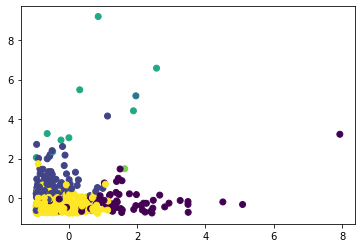

In [308]:
#instantiate model
model = KMeans(n_clusters=6)
#train
model.fit(scaled)
#predict
predictions = model.predict(scaled) +1
#visualize(before)
plt.scatter(scaled[:, 0], scaled[:, 1], c=predictions, cmap='viridis')

In [309]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(df)

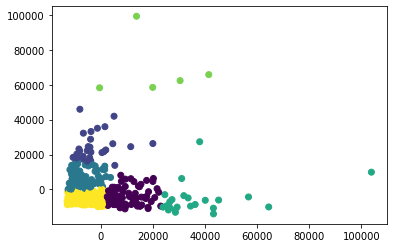

In [310]:
#train and predition for reduced dimensionality
model = KMeans(n_clusters=6)
model.fit(reduced)
predictions_reduced = model.predict(reduced) +1
#visualize
plt.scatter(reduced[:, 0], reduced[:, 1], c=predictions_reduced, cmap='viridis')

In [311]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [312]:
c_matrix_scaled = confusion_matrix(channel,predictions)
accuracy_scaled = accuracy_score(channel,predictions)

c_matrix_scaled



array([[ 57,  10,   1,   0,   1, 229],
       [  8,  88,   0,  10,   0,  36],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0]])

In [313]:
print(accuracy_scaled)

0.32954545454545453


In [314]:
c_matrix_scaled = confusion_matrix(channel,predictions_reduced)
accuracy_scaled = accuracy_score(channel,predictions_reduced)

c_matrix_scaled

array([[ 78,   0,  22,  21,   0, 177],
       [ 21,  30,  71,   2,   5,  13],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0]])

In [315]:
print(accuracy_scaled)

0.24545454545454545
